     Channel  Region  Fresh  ...  Frozen  Detergents_Paper  Delicassen
0          2       3  12669  ...     214              2674        1338
1          2       3   7057  ...    1762              3293        1776
2          2       3   6353  ...    2405              3516        7844
3          1       3  13265  ...    6404               507        1788
4          2       3  22615  ...    3915              1777        5185
..       ...     ...    ...  ...     ...               ...         ...
435        1       3  29703  ...   13135               182        2204
436        1       3  39228  ...    4510                93        2346
437        2       3  14531  ...     437             14841        1867
438        1       3  10290  ...    1038               168        2125
439        1       3   2787  ...      65               477          52

[440 rows x 8 columns]
(440, 8)


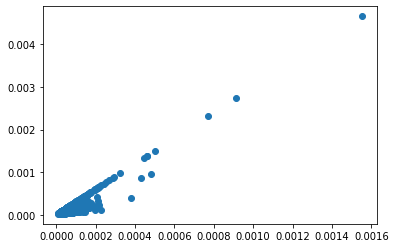

In [ ]:
# importer les données depuis notre drive coolab 
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.cluster import KMeans
from numpy import where
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import normalize
dataset1=pd.read_csv('/content/Wholesale customers data.csv')
print(dataset1)
x = dataset1.values
x=normalize(x)
print(x.shape)
plt.scatter(x[:,0],x[:,1])
plt.show()


[[ 0.03403705 -0.18042088  0.22975424]
 [ 0.35105737 -0.04664416  0.18028567]
 [ 0.30537543  0.05555107  0.22151184]
 ...
 [ 0.46483711 -0.1918836  -0.10897555]
 [-0.41200132 -0.12067567  0.05906545]
 [ 0.10296864 -0.21244563  0.03842037]]


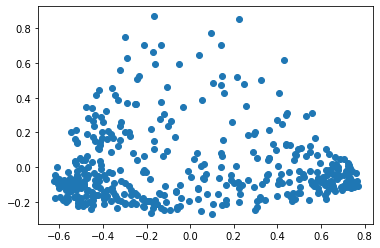

In [ ]:
# application des methodes PCA pour reduire a deux(02) dimension le nombre de cluster 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
xpca=pca.fit_transform(x)
print(xpca)
pyplot.scatter(xpca[:,0], xpca[:,1])
for c in range(2):
  r = where(x==c)
  pyplot.scatter(xpca[r,0], xpca[r,1])
pyplot.show()


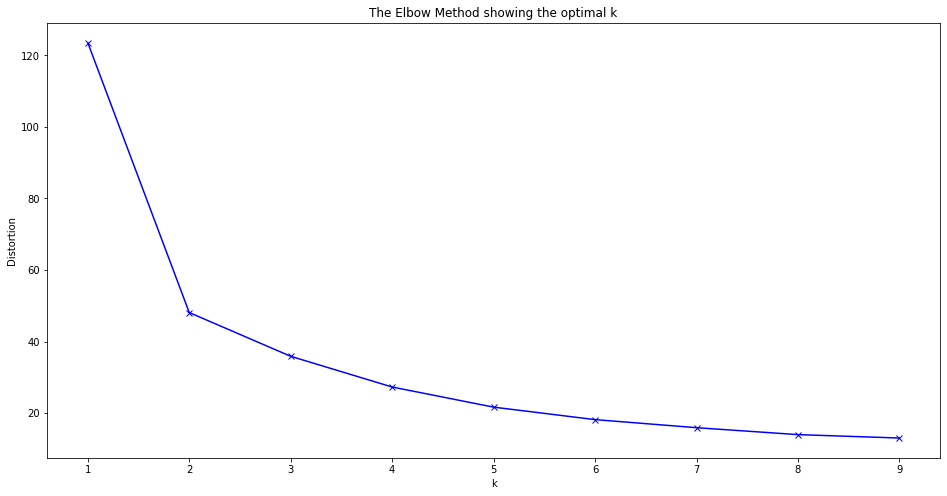

In [ ]:
#nous allons tracer notre courbe silhouette pour prédire notre pas optimal pour le clustering ici k = 5 
distortions = []
K = range(1,10)
for k in K:
    kmodel = KMeans(n_clusters=k)
    kmodel.fit(xpca)
    distortions.append(kmodel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

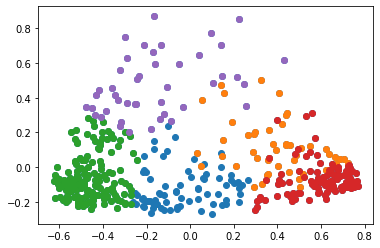

In [ ]:
#application des kmeans (nous remarquand ici que la classification en 05 cluster  )
from sklearn.preprocessing import normalize

x=normalize(x)

model = KMeans(n_clusters=5)
model.fit(xpca)
ypred = model.predict(xpca)

pyplot.scatter(xpca[:,0], xpca[:,1])
for c in range(4):
  r = where(ypred==c)
  pyplot.scatter(xpca[r,0], xpca[r,1])
pyplot.show()


/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 100 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


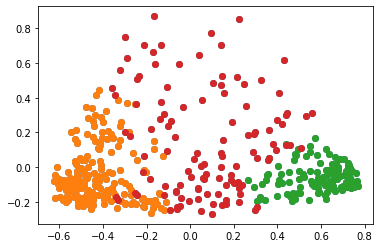

In [ ]:
# application des GMM 
from sklearn.mixture import GaussianMixture

pca = PCA(n_components=3)
xpca=pca.fit_transform(x)
c= labels
gmm = GaussianMixture(n_components=3, covariance_type='diag', max_iter=1, n_init=100)
gmm.fit(xpca)
labels=gmm.predict(xpca)
c=labels
pyplot.scatter(xpca[:,0], xpca[:,1])
for c in range(4):
  r = where(labels==c)
  pyplot.scatter(xpca[r,0], xpca[r,1])
pyplot.show()

prob = gmm.predict_proba(xpca)
#print(prob)

<function matplotlib.pyplot.show>

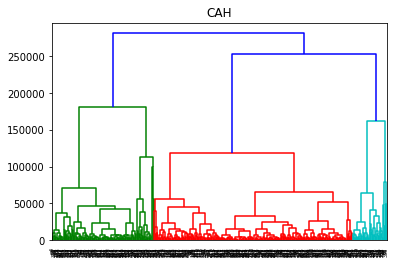

In [ ]:
#cha 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

data=pd.read_csv('/content/Wholesale customers data.csv')
pca = PCA(n_components=3)
xpca=pca.fit_transform(data)


xpca = np.array(data)
Z = linkage(xpca ,method='ward',metric='euclidean')
plt.title("CAH")
dendrogram (Z)
plt.show


[-1 -1 -1 -1  0 -1  0 -1 -1  1 -1  0  0 -1  0  0  1 -1  0 -1  0 -1  0 -1
 -1  0  0  0  1  0  0 -1  0  0 -1  1  0 -1 -1  0 -1  0 -1  1 -1 -1  1 -1
 -1  1 -1 -1  0  1  0 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  0 -1 -1
 -1 -1 -1  0 -1 -1  0 -1 -1  1 -1  0  0  1 -1  0 -1  0  0 -1  1 -1 -1  1
  1 -1 -1 -1 -1  1 -1  0  0  0  1 -1 -1  1  0 -1 -1  0  0  0  0 -1  0 -1
  0 -1  0 -1  0  0 -1  0 -1  0 -1  0  0  0  0  0 -1 -1  0 -1  0 -1  0 -1
  0 -1  0  0 -1  0  0 -1  0 -1  0  1 -1  0  1  1  1  0  0  1 -1 -1 -1 -1
  0 -1  1 -1  1  1 -1  1  0 -1 -1 -1 -1  0  1 -1 -1 -1 -1 -1 -1 -1 -1  0
  0 -1  0 -1 -1  1 -1  0  1  1 -1 -1 -1  1  0 -1 -1  1  0  1  0 -1  1  1
  1  0  1 -1  0 -1 -1 -1  0  0  0 -1 -1 -1 -1 -1  0 -1  0 -1 -1  0  0  0
 -1  0  0  0 -1  1  0  0 -1 -1 -1  1 -1  0 -1  0  0 -1  0  0 -1 -1  0 -1
  1 -1  1  0 -1  0 -1 -1 -1  0 -1 -1  0 -1 -1  0 -1 -1  0 -1  0  0  0 -1
  0  0 -1 -1 -1  1  0 -1  0 -1 -1  1  0  1  1 -1  1 -1  1  0  0 -1 -1  0
 -1 -1 -1 -1  0  1  0 -1 -1 -1  0 -1  0 -1 -1 -1 -1

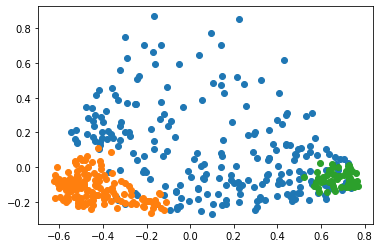

Estimated number of clusters: 2
Estimated number of noise points: 230


In [ ]:
#dbscan 
from sklearn.cluster import DBSCAN
from numpy import where
from matplotlib import pyplot
data=pd.read_csv('/content/Wholesale customers data.csv')
data=normalize(data)
pca = PCA(n_components=3)
xpca=pca.fit_transform(data)
azerty = DBSCAN(eps=0.1, min_samples=15).fit(xpca)
print(azerty.labels_)
pred = azerty.fit_predict(xpca)
for c in range(-1,10):
  r = where(pred==c)
  pyplot.scatter(xpca[r,0], xpca[r,1])
pyplot.show()
n_clusters_ = len(set(pred)) - (1 if -1 in pred else 0)
n_noise_ = list(pred).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

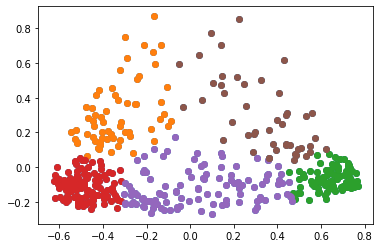

In [ ]:
#speactral clusturing 
from sklearn.cluster import SpectralClustering
import numpy as np
data=pd.read_csv('/content/Wholesale customers data.csv')
data=normalize(data)
pca = PCA(n_components=2)
xpca=pca.fit_transform(data)
clustering = SpectralClustering(n_clusters=5, assign_labels='discretize',random_state=0).fit(xpca)
pred = clustering.fit_predict(xpca)
clustering.labels_
pyplot.scatter(xpca[:,0], xpca[:,1])
for c in range(5):
  r = where(pred==c)
  pyplot.scatter(xpca[r,0], xpca[r,1])
pyplot.show()



      Unnamed: 0  CustomerID  InvoiceNo  LatestDay  SpendingPerInvoice
0              0     12346.0          1        325        77183.600000
1              1     12347.0          7        366          615.714286
2              2     12348.0          4        357          449.310000
3              3     12349.0          1         18         1757.550000
4              4     12350.0          1        309          334.400000
...          ...         ...        ...        ...                 ...
4333        4333     18280.0          1        277          180.600000
4334        4334     18281.0          1        180           80.820000
4335        4335     18282.0          2        125           89.025000
4336        4336     18283.0         16        336          130.930000
4337        4337     18287.0          3        201          612.426667

[4338 rows x 5 columns]
(4338, 3)


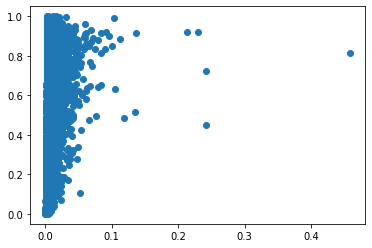

In [ ]:
# importer les données (2) 
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.cluster import KMeans
from numpy import where
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import normalize

dataset2=pd.read_csv('/content/rfm_data.csv')
print(dataset2)

x = dataset2[['InvoiceNo', 'LatestDay', 'SpendingPerInvoice']].values
x=normalize(x)
print(x.shape)
plt.scatter(x[:,0],x[:,1])
plt.show()


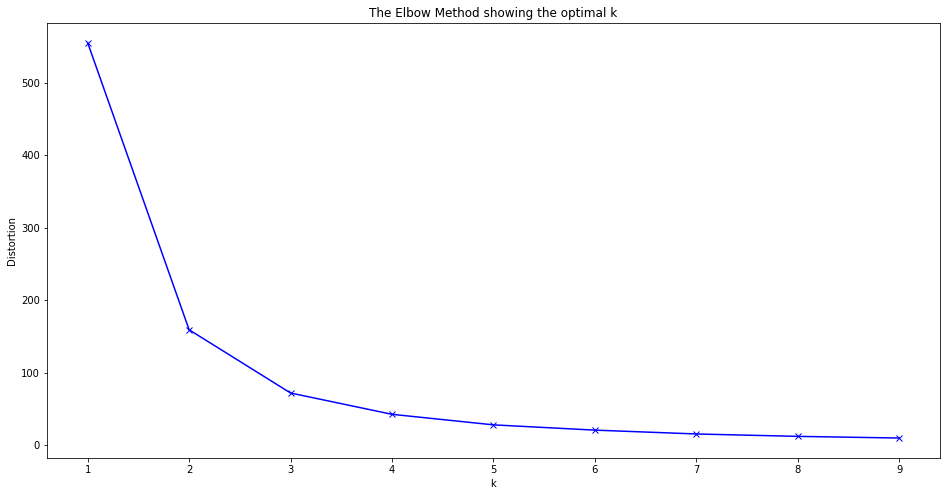

In [ ]:
#la silhouette est couder a 4 du coup le nombre de cluster det 4 
distortions = []
K = range(1,10)
for k in K:
    kmodel = KMeans(n_clusters=k)
    kmodel.fit(xpca)
    distortions.append(kmodel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

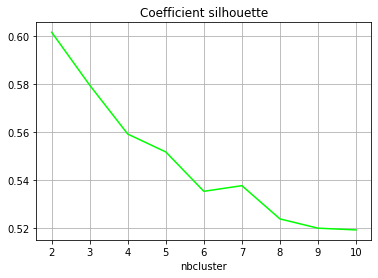

Silhouette Coefficient: 0.713


In [ ]:
from sklearn.metrics import silhouette_score
def Silhouette(xpca):
  tab_silhouette=[]
  for i in range(2, 11):
      kmeans=KMeans(n_clusters=i)
      cluster_labels=kmeans.fit_predict(xpca)
      tab_silhouette.append(silhouette_score(xpca, cluster_labels))
  plt.plot(range(2, 11), tab_silhouette, c="#00FF00")
  plt.title('Coefficient silhouette')
  plt.xlabel("nbcluster")
  plt.grid()
  plt.show()
Silhouette(xpca)
sc = KMeans(n_clusters=5).fit(xpca)
labels = sc.predict(xpca)
print(
    "Silhouette Coefficient: %0.3f" % silhouette_score(xpca, labels, metric="sqeuclidean")
)


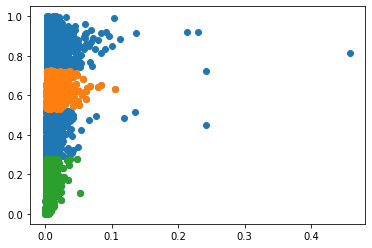

In [ ]:
#application des kmeans 
from sklearn.preprocessing import normalize

x=normalize(x)

model = KMeans(n_clusters=5)
model.fit(x)
ypred = model.predict(x)

pyplot.scatter(x[:,0], x[:,1])
for c in range(2):
  r = where(ypred==c)
  pyplot.scatter(x[r,0], x[r,1])
pyplot.show()


/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 100 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


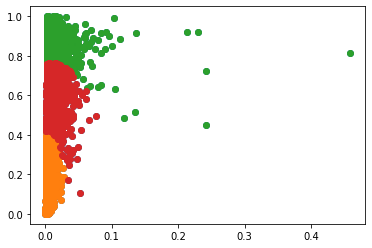

[[9.99999998e-001 5.04521596e-040 1.57876134e-009]
 [5.50575243e-005 8.31533731e-009 9.99944934e-001]
 [4.28073733e-013 2.96769703e-005 9.99970323e-001]
 ...
 [1.69613904e-050 9.86082712e-001 1.39172882e-002]
 [1.33666808e-131 1.00000000e+000 1.03006728e-010]
 [9.99330438e-001 2.83667485e-019 6.69562349e-004]]


In [ ]:
# application des GMM 
from sklearn.mixture import GaussianMixture


gmm = GaussianMixture(n_components=3, covariance_type='diag', max_iter=1, n_init=100)
gmm.fit(x)
labels=gmm.predict(x)
c=labels
pyplot.scatter(x[:,0], x[:,1])
for c in range(4):
  r = where(labels==c)
  pyplot.scatter(x[r,0], x[r,1])
pyplot.show()

prob = gmm.predict_proba(x)
print(prob)

<function matplotlib.pyplot.show>

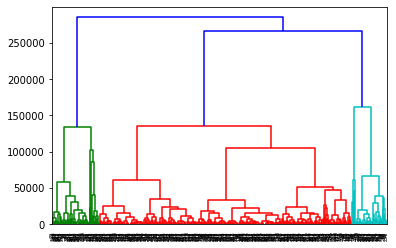

In [ ]:
#cha 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
data=pd.read_csv('/content/Wholesale customers data.csv')
pca = PCA(n_components=3)
xpca=pca.fit_transform(data)
Z = linkage(xpca ,method='ward',metric='euclidean')
dendrogram (Z)
plt.show


[0 0 0 ... 0 0 0]


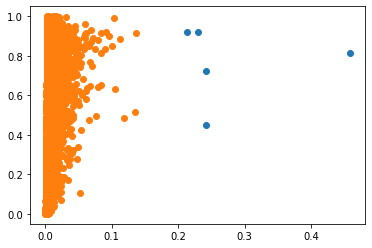

Estimated number of clusters: 1
Estimated number of noise points: 5


In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN
from numpy import where
from matplotlib import pyplot
dataset2=pd.read_csv('/content/rfm_data.csv')
x = dataset2[['InvoiceNo','LatestDay','SpendingPerInvoice']].values
x=normalize(x)
azerty = DBSCAN(eps=0.1, min_samples=15).fit(x)
print(azerty.labels_)
pred = azerty.fit_predict(x)
for c in range(-1,10):
  r = where(pred==c)
  pyplot.scatter(x[r,0], x[r,1])
pyplot.show()
n_clusters_ = len(set(pred)) - (1 if -1 in pred else 0)
n_noise_ = list(pred).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)








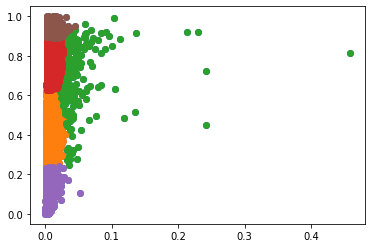

In [ ]:
from sklearn.cluster import SpectralClustering
import numpy as np
dataset2=pd.read_csv('/content/rfm_data.csv')
x = dataset2[['InvoiceNo','LatestDay','SpendingPerInvoice']].values
x=normalize(x)
clustering = SpectralClustering(n_clusters=5, assign_labels='discretize',random_state=0).fit(x)
pred = clustering.fit_predict(x)
clustering.labels_
pyplot.scatter(x[:,0], x[:,1])
for c in range(5):
  r = where(pred==c)
  pyplot.scatter(x[r,0], x[r,1])
pyplot.show()
